In [1]:
import pandas as pd
import numpy as np

In [2]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [3]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando posições NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se na posição 8532. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta à posição da NCM em que os códigos NCM foram mais recorrentes.

In [4]:
# testa capítulos mais recorrentes
df["POSIÇÃO_NCM"] = df["CO_NCM"].astype(str).str[:4]

In [5]:
df["POSIÇÃO_NCM"].value_counts()

8708    51461
8536    43444
8481    36563
8483    35341
7318    34623
        ...  
2081        1
2069        1
3063        1
3054        1
8059        1
Name: POSIÇÃO_NCM, Length: 1263, dtype: int64

In [6]:
# no caso em questão será selecionada a 7318, pois, embora seja a 5ª na lista acima, é a primeira se levarmos em conta a
df1=df[df["POSIÇÃO_NCM"]=="7318"]

In [7]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,POSIÇÃO_NCM
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,4.108924,4.154725,7318
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,4.108924,4.154725,7318
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,4.108924,4.154725,7318
21,2019-01,73182400,10,249,SC,1,927800,47,47,1767,3.741055,3.884405,7318
34,2019-01,73181600,10,386,SP,1,817800,8730,8730,76390,3.741055,3.884405,7318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763962,2019-08,73181500,10,275,MG,4,617700,37,37,3452,4.019382,3.778713,7318
1763977,2019-08,73182400,10,249,PR,4,817600,1,1,48,4.019382,3.778713,7318
1764040,2019-08,73181500,10,249,SC,1,817800,2,2,46,4.019382,3.778713,7318
1764114,2019-08,73181100,10,245,CE,4,317901,3,3,1,4.019382,3.778713,7318


In [8]:
df1.drop(columns="POSIÇÃO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,4.108924,4.154725
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,4.108924,4.154725
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,4.108924,4.154725
21,2019-01,73182400,10,249,SC,1,927800,47,47,1767,3.741055,3.884405
34,2019-01,73181600,10,386,SP,1,817800,8730,8730,76390,3.741055,3.884405
...,...,...,...,...,...,...,...,...,...,...,...,...
1763962,2019-08,73181500,10,275,MG,4,617700,37,37,3452,4.019382,3.778713
1763977,2019-08,73182400,10,249,PR,4,817600,1,1,48,4.019382,3.778713
1764040,2019-08,73181500,10,249,SC,1,817800,2,2,46,4.019382,3.778713
1764114,2019-08,73181100,10,245,CE,4,317901,3,3,1,4.019382,3.778713


In [10]:
# checando quais os códigos NCM mais recorrentes
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
4,73181500,9334
5,73181600,5493
11,73182900,5130
8,73182200,4230
6,73181900,2711
7,73182100,2434
10,73182400,2029
9,73182300,1320
3,73181400,1278
2,73181300,387


In [11]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [12]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [13]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [14]:
g2

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
4,73181500,9334,0.269590,0.269590
5,73181600,5493,0.158652,0.428241
11,73182900,5130,0.148167,0.576409
8,73182200,4230,0.122173,0.698582
6,73181900,2711,0.078301,0.776882
7,73182100,2434,0.070300,0.847183
10,73182400,2029,0.058603,0.905785
9,73182300,1320,0.038125,0.943910
3,73181400,1278,0.036912,0.980822
2,73181300,387,0.011178,0.992000


In [15]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3.head()
# repare que 95% das ocorrências se restingem a 30 códigos NCM dentre os 45.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
4,73181500,9334,0.269590,0.269590
5,73181600,5493,0.158652,0.428241
11,73182900,5130,0.148167,0.576409
8,73182200,4230,0.122173,0.698582
6,73181900,2711,0.078301,0.776882


In [16]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
3,73181400,1278,0.036912,0.980822
2,73181300,387,0.011178,0.992000
1,73181200,232,0.006701,0.998700
0,73181100,45,0.001300,1.000000


In [17]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [18]:
mask=df1['CO_NCM'].isin(idx)
mask

8          False
13         False
14         False
21         False
34         False
           ...  
1763962    False
1763977    False
1764040    False
1764114     True
1764331    False
Name: CO_NCM, Length: 34623, dtype: bool

In [19]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-19-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [20]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [21]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,4.108924,4.154725,73181500
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,4.108924,4.154725,73181600
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,4.108924,4.154725,73181600
21,2019-01,73182400,10,249,SC,1,927800,47,47,1767,3.741055,3.884405,73182400
34,2019-01,73181600,10,386,SP,1,817800,8730,8730,76390,3.741055,3.884405,73181600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763962,2019-08,73181500,10,275,MG,4,617700,37,37,3452,4.019382,3.778713,73181500
1763977,2019-08,73182400,10,249,PR,4,817600,1,1,48,4.019382,3.778713,73182400
1764040,2019-08,73181500,10,249,SC,1,817800,2,2,46,4.019382,3.778713,73181500
1764114,2019-08,73181100,10,245,CE,4,317901,3,3,1,4.019382,3.778713,99999999


In [22]:
df1["CO_NCM_final"].value_counts()

73181500    9334
73181600    5493
73182900    5130
73182200    4230
73181900    2711
73182100    2434
73182400    2029
99999999    1942
73182300    1320
Name: CO_NCM_final, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [23]:
# A análise a seguir não se faz necessária, uma vez que todas as importações no âmbito da posição 7318 tem o quilograma (CO_UNID igual a 10) como unidade de medida estatística
#g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
#g1.sort_values(by=["contagem"],ascending=False)

In [24]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-24-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [25]:
# no caso corrente não há CO_UNID minoritários para serem agrupados em categorial residual. Portanto, não se executará o código a seguir.
#mask=df1['CO_UNID']!=11
#mask

In [26]:
#df1.loc[mask, "CO_UNID_final"] = 99

In [27]:
df1["CO_UNID_final"].value_counts()

10    34623
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [28]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
36,249,3913
21,160,3422
1,23,2927
53,386,2360
22,161,1667
...,...,...
67,507,1
69,528,1
83,625,1
73,566,1


In [29]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [30]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [31]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [32]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
36,249,3913,0.113017,0.113017
21,160,3422,0.098836,0.211853
1,23,2927,0.084539,0.296393
53,386,2360,0.068163,0.364555
22,161,1667,0.048147,0.412703


In [33]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 33 países dentre os 111.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 36 to 93
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           33 non-null     int64  
 1   contagem          33 non-null     int64  
 2   % CO_PAIS         33 non-null     float64
 3   % CO_PAIS ACUMUL  33 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


In [34]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
70,538,209,0.006036,0.950726
80,607,149,0.004303,0.955030
6,69,147,0.004246,0.959276
38,267,118,0.003408,0.962684
50,375,96,0.002773,0.965456
...,...,...,...,...
67,507,1,0.000029,0.999884
69,528,1,0.000029,0.999913
83,625,1,0.000029,0.999942
73,566,1,0.000029,0.999971


In [35]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [36]:
mask=df1['CO_PAIS'].isin(idx)
mask

8          False
13         False
14         False
21         False
34         False
           ...  
1763962    False
1763977    False
1764040    False
1764114    False
1764331     True
Name: CO_PAIS, Length: 34623, dtype: bool

In [37]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-37-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [38]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [39]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,4.108924,4.154725,73181500,10,23
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,4.108924,4.154725,73181600,10,23
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,4.108924,4.154725,73181600,10,249
21,2019-01,73182400,10,249,SC,1,927800,47,47,1767,3.741055,3.884405,73182400,10,249
34,2019-01,73181600,10,386,SP,1,817800,8730,8730,76390,3.741055,3.884405,73181600,10,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763962,2019-08,73181500,10,275,MG,4,617700,37,37,3452,4.019382,3.778713,73181500,10,275
1763977,2019-08,73182400,10,249,PR,4,817600,1,1,48,4.019382,3.778713,73182400,10,249
1764040,2019-08,73181500,10,249,SC,1,817800,2,2,46,4.019382,3.778713,73181500,10,249
1764114,2019-08,73181100,10,245,CE,4,317901,3,3,1,4.019382,3.778713,99999999,10,245


In [40]:
df1["CO_PAIS_final"].value_counts()

249    3913
160    3422
23     2927
386    2360
999    1915
161    1667
399    1542
275    1463
190    1251
245    1155
628    1107
361    1066
764     987
149     798
767     643
791     643
573     627
776     625
827     609
271     606
72      604
232     565
493     553
603     536
87      447
63      374
858     348
365     326
105     275
455     274
351     268
355     263
247     249
741     215
Name: CO_PAIS_final, dtype: int64

###### Checando URF (CO_URF) recorrentes

In [41]:
g1=df1.groupby(['CO_URF']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_URF,contagem
30,817800,7888
28,817600,5365
29,817700,3564
34,917800,1991
24,717700,1665
23,717600,1654
40,927800,1367
46,1017700,1176
39,927700,1165
18,617700,1030


In [42]:
g1["% CO_URF"] = g1["contagem"]/(g1["contagem"].sum())

In [43]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [44]:
g2["% CO_URF ACUMUL"]=g2["% CO_URF"].cumsum()

In [45]:
g2.head()

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
30,817800,7888,0.227825,0.227825
28,817600,5365,0.154955,0.382780
29,817700,3564,0.102937,0.485718
34,917800,1991,0.057505,0.543223
24,717700,1665,0.048089,0.591312


In [46]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_URF ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 18 UF dentre as 51.

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
30,817800,7888,0.227825,0.227825
28,817600,5365,0.154955,0.382780
29,817700,3564,0.102937,0.485718
34,917800,1991,0.057505,0.543223
24,717700,1665,0.048089,0.591312
23,717600,1654,0.047772,0.639084
40,927800,1367,0.039482,0.678566
46,1017700,1176,0.033966,0.712532
39,927700,1165,0.033648,0.746180
18,617700,1030,0.029749,0.775929


In [47]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_URF ACUMUL"]>0.95]
g4

,CO_URF,contagem,% CO_URF,% CO_URF ACUMUL
14,417902,322,0.009300,0.950726
9,317901,305,0.008809,0.959536
0,0,237,0.006845,0.966381
45,1017503,223,0.006441,0.972822
44,1017500,191,0.005517,0.978338
8,317900,179,0.005170,0.983508
26,727600,121,0.003495,0.987003
5,217801,98,0.002830,0.989833
15,420154,82,0.002368,0.992202
36,917901,43,0.001242,0.993444


In [48]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_URF"]

In [49]:
mask=df1['CO_URF'].isin(idx)
mask

8          False
13         False
14         False
21         False
34         False
           ...  
1763962    False
1763977    False
1764040    False
1764114     True
1764331    False
Name: CO_URF, Length: 34623, dtype: bool

In [50]:
df1["CO_URF_final"]=df1["CO_URF"]

<ipython-input-50-0ff9bd238ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_URF_final"]=df1["CO_URF"]


In [51]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "CO_URF_final"] = 999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [52]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,CO_URF_final
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,4.108924,4.154725,73181500,10,23,817700
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,4.108924,4.154725,73181600,10,23,817800
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,4.108924,4.154725,73181600,10,249,817800
21,2019-01,73182400,10,249,SC,1,927800,47,47,1767,3.741055,3.884405,73182400,10,249,927800
34,2019-01,73181600,10,386,SP,1,817800,8730,8730,76390,3.741055,3.884405,73181600,10,386,817800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763962,2019-08,73181500,10,275,MG,4,617700,37,37,3452,4.019382,3.778713,73181500,10,275,617700
1763977,2019-08,73182400,10,249,PR,4,817600,1,1,48,4.019382,3.778713,73182400,10,249,817600
1764040,2019-08,73181500,10,249,SC,1,817800,2,2,46,4.019382,3.778713,73181500,10,249,817800
1764114,2019-08,73181100,10,245,CE,4,317901,3,3,1,4.019382,3.778713,99999999,10,245,999999


In [53]:
df1["CO_URF_final"].value_counts()

817800     7888
817600     5365
817700     3564
999999     2028
917800     1991
717700     1665
717600     1654
927800     1367
1017700    1176
927700     1165
617700     1030
917900     1022
227600      956
517800      804
227700      796
717800      750
1017801     544
517801      506
417901      352
Name: CO_URF_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [54]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
1,1,18207
2,4,15638
4,7,529
0,0,232
6,10,9
3,5,5
5,9,3


In [55]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [56]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [57]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [58]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
1,1,18207,0.525864,0.525864
2,4,15638,0.451665,0.977529
4,7,529,0.015279,0.992808
0,0,232,0.006701,0.999509
6,10,9,0.000260,0.999769
3,5,5,0.000144,0.999913
5,9,3,0.000087,1.000000


In [59]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-59-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [60]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [61]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [62]:
df1["CO_VIA_final"].value_counts()

1     18207
4     15638
7       529
99      249
Name: CO_VIA_final, dtype: int64

###### No presente caso substituiu-se a feature SG_UF_NCM pela CO_URF (tendo em vista que ambas são relacionadas), no intuito de verificar se haverá melhora no modelo.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [63]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-63-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [64]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'CO_URF_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [65]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,0,0,0,0,0,0,0,0,0,1
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,0,0,0,0,0,0,0,0,0,1
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-12,NCM_73181500,NCM_73181600,NCM_73181900,NCM_73182100,NCM_73182200,NCM_73182300,NCM_73182400,NCM_73182900,NCM_99999999
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,1,1,0,0,0,0,0,0,0,0
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,1,0,1,0,0,0,0,0,0,0
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,1,0,1,0,0,0,0,0,0,0


In [67]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_73181500,NCM_73181600,NCM_73181900,NCM_73182100,NCM_73182200,NCM_73182300,NCM_73182400,NCM_73182900,NCM_99999999,Un.Med.Est._10
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,1,0,0,0,0,0,0,0,0,1
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,0,1,0,0,0,0,0,0,0,1
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,0,1,0,0,0,0,0,0,0,1


In [68]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_603,Pais_628,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_858,Pais_999
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,0,0,0,0,0,0,0,0,0,0
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,0,0,0,0,0,0,0,0,0,0
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_URF_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_817600,UF_817700,UF_817800,UF_917800,UF_917900,UF_927700,UF_927800,UF_999999,UF_1017700,UF_1017801
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,0,1,0,0,0,0,0,0,0,0
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,0,0,1,0,0,0,0,0,0,0
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,0,0,1,0,0,0,0,0,0,0


In [70]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_917900,UF_927700,UF_927800,UF_999999,UF_1017700,UF_1017801,Modal_1,Modal_4,Modal_7,Modal_99
8,2019-12,73181500,10,23,SP,4,817700,1851,1851,70952,...,0,0,0,0,0,0,0,1,0,0
13,2019-12,73181600,10,23,SP,1,817800,24296,24296,182720,...,0,0,0,0,0,0,1,0,0,0
14,2019-12,73181600,10,249,SP,1,817800,27934,27934,349017,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'CO_URF_final', 'CO_VIA_final'])

In [72]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06', 'Mês_2019-07',
       'Mês_2019-08', 'Mês_2019-09', 'Mês_2019-10', 'Mês_2019-11',
       'Mês_2019-12', 'NCM_73181500', 'NCM_73181600', 'NCM_73181900',
       'NCM_73182100', 'NCM_73182200', 'NCM_73182300', 'NCM_73182400',
       'NCM_73182900', 'NCM_99999999', 'Un.Med.Est._10', 'Pais_23', 'Pais_63',
       'Pais_72', 'Pais_87', 'Pais_105', 'Pais_149', 'Pais_160', 'Pais_161',
       'Pais_190', 'Pais_232', 'Pais_245', 'Pais_247', 'Pais_249', 'Pais_271',
       'Pais_275', 'Pais_351', 'Pais_355', 'Pais_361', 'Pais_365', 'Pais_386',
       'Pais_399', 'Pais_455', 'Pais_493', 'Pais_573', 'Pais_603', 'Pais_628',
       'Pais_741', 'Pais_764', 'Pais_767', 'Pais_776', 'Pais_791', 'Pais_827',
       'Pais_858', 'Pais_999', 'UF_227600', 'UF_227700', 'UF_417901',
       'UF_517800', 'UF_517801', 'UF_617700', 'UF_

In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34623 entries, 8 to 1764331
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QT_ESTAT             34623 non-null  int64  
 1   câmbio_mês_atual     34623 non-null  float64
 2   câmbio_mês_anterior  34623 non-null  float64
 3   VL_FOB/QT_ESTAT      34623 non-null  float64
 4   Mês_2019-01          34623 non-null  uint8  
 5   Mês_2019-02          34623 non-null  uint8  
 6   Mês_2019-03          34623 non-null  uint8  
 7   Mês_2019-04          34623 non-null  uint8  
 8   Mês_2019-05          34623 non-null  uint8  
 9   Mês_2019-06          34623 non-null  uint8  
 10  Mês_2019-07          34623 non-null  uint8  
 11  Mês_2019-08          34623 non-null  uint8  
 12  Mês_2019-09          34623 non-null  uint8  
 13  Mês_2019-10          34623 non-null  uint8  
 14  Mês_2019-11          34623 non-null  uint8  
 15  Mês_2019-12          34623 non-nul

In [74]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values(ascending=False)
correlacoes.head(20)

VL_FOB/QT_ESTAT    1.000000
Modal_1            0.176811
Modal_4            0.172540
UF_817800          0.085923
UF_717700          0.085319
Pais_249           0.078622
Pais_275           0.075753
Pais_160           0.060483
UF_817700          0.055360
UF_999999          0.053178
UF_917900          0.050113
UF_917800          0.047852
Modal_99           0.046090
UF_617700          0.042896
Pais_767           0.041084
NCM_99999999       0.040084
UF_817600          0.037481
UF_927700          0.037471
UF_1017700         0.037148
NCM_73182900       0.033370
Name: VL_FOB/QT_ESTAT, dtype: float64

In [75]:
# Identificando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
(correlacoes[correlacoes >= 0.041]).index

Index(['VL_FOB/QT_ESTAT', 'Modal_1', 'Modal_4', 'UF_817800', 'UF_717700',
       'Pais_249', 'Pais_275', 'Pais_160', 'UF_817700', 'UF_999999',
       'UF_917900', 'UF_917800', 'Modal_99', 'UF_617700', 'Pais_767'],
      dtype='object')

In [76]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,01) para serem mantidas e excluídas as demais
df2 = df_encoded[(correlacoes[correlacoes >= 0.041]).index]

In [77]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

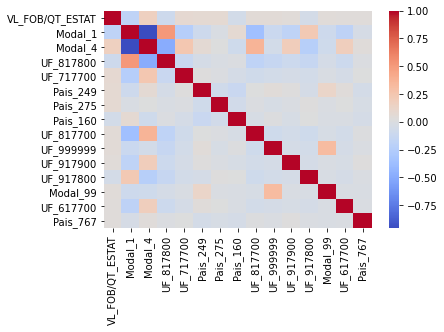

In [78]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False)

In [79]:
#Considerando que as Modal_1 e Modal_4 estão fortemente relacionadas, irei retirar uma delas antes da elaboração do modelo
df2=df2.drop(columns="Modal_1")

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [80]:
df2.columns

Index(['VL_FOB/QT_ESTAT', 'Modal_4', 'UF_817800', 'UF_717700', 'Pais_249',
       'Pais_275', 'Pais_160', 'UF_817700', 'UF_999999', 'UF_917900',
       'UF_917800', 'Modal_99', 'UF_617700', 'Pais_767'],
      dtype='object')

In [81]:
x = df2[['Modal_4', 'UF_817800', 'UF_717700', 'Pais_249',
       'Pais_275', 'Pais_160', 'UF_817700', 'UF_999999', 'UF_917900',
       'UF_917800', 'Modal_99', 'UF_617700', 'Pais_767']]
y = df2['VL_FOB/QT_ESTAT']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

In [86]:
lm.fit(x_train,y_train)

LinearRegression()

In [87]:
# impressão do intercepto
print(lm.intercept_)

9.823134050606129


In [88]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Modal_4,138.326687
UF_817800,12.777494
UF_717700,118.519025
Pais_249,96.693346
Pais_275,192.573706
Pais_160,-46.607731
UF_817700,18.556826
UF_999999,119.031630
UF_917900,55.481270
UF_917800,-2.526636


In [89]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [91]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [94]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [95]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [96]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [97]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

357.20401414304723

In [98]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

356.9494271046892

In [99]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

356.27065039167155

#### Mean absolute error - MAE

In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

130.12079667057884

In [102]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

121.39950978743228

In [103]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

121.56073154071109

#### Mean squared error - MSE

In [104]:
from sklearn.metrics import mean_absolute_error

In [105]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

127594.70771990628

In [106]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

127412.89351036584

In [107]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

126928.77633050467

#### Coeficente de determinação - R²

In [108]:
from sklearn.metrics import r2_score

In [109]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.0446130904315879

In [110]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

0.0459744550122394

In [111]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

0.04959936410605437